# Boston Housing

## 1. Introduction

In this project we will analyse the Boston housing dataset where each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970 by the U.S Census Service and published in 1978. We will then develop a model for predicting a continuous target variable (the median house value) from a given set of feature variables. 

## 2. Import libraries and data

In [1]:
# Import libraries necessary for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)

%matplotlib inline 



In [2]:
# Load the Boston housing dataset
boston_dataset = datasets.load_boston()

In [3]:
# Print the keys to the dictionary to see what attributes it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# Description of the dataset
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The median house value `MEDV` is our **_target variable_** and the remaining 13 are the **_feature variables_** based on which we will predict the value of a house.

In [5]:
# Dataset has 506 samples and 13 feature variables (plus the target variable)
boston_dataset.data.shape

(506, 13)

In [6]:
# Unique attribute names which  will be used as column names when converted to a pandas dataframe
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
# Convert data to dataframe and and add feature names to the data
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# Add the target variable to the dataframe and store at the front to distinguish from features
boston['MEDV'] = boston_dataset.target
y = boston['MEDV'].copy()
del boston['MEDV']
boston = pd.concat((y, boston), axis=1)

In [9]:
# Check that target variable is there
boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# Check number of samples and variables is as expected
boston.shape

(506, 14)

In [11]:
# Concise summary of the dataframe
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
MEDV       506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
# Check for missing values
pd.isnull(boston).any()

MEDV       False
CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

In [13]:
# Check for zero values
boston[boston==0].count()

MEDV         0
CRIM         0
ZN         372
INDUS        0
CHAS       471
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
dtype: int64

## 3. Exploratory Data Analysis (EDA)

In [14]:
# Descriptive statistics to summarise the distribution of the dataset
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Some points to note are that:

- ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) has 0 for the 25th and 50th percentiles, and CHAS (Charles River dummy variable (1 if tract bounds river; 0 otherwise)) has 0 for the 25th, 50th and 75th percentiles. Both variables are conditional and categorical variables. These features may not be useful in a regression task such as predicting MEDV (Median value of owner-occupied homes in $1000's).


- For the max value of MEDV it has been noted at https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html that Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values above 50.00 may not help to predict MEDV.

### Histogram plotting the distribution of the target variable MEDV

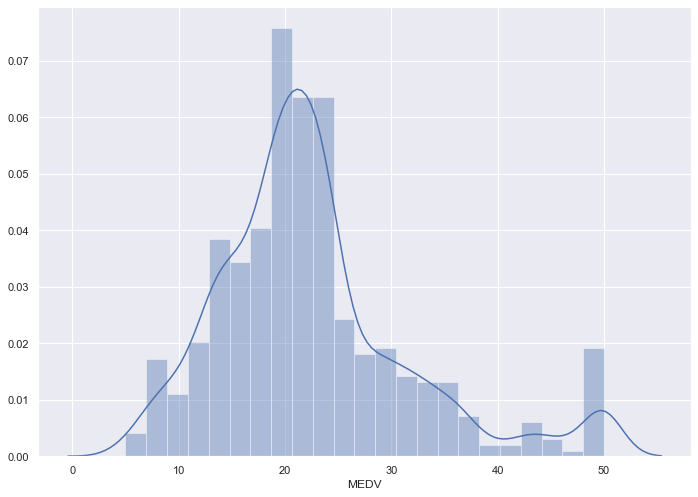

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], hist=True);
plt.show()

We can see that the values of MEDV are distributed normally with a few outliers. There is a large upper-limit bin around $50,000 which fits with the suggestion that median house values in the dataset were capped at 50k.

### Normal probability plot

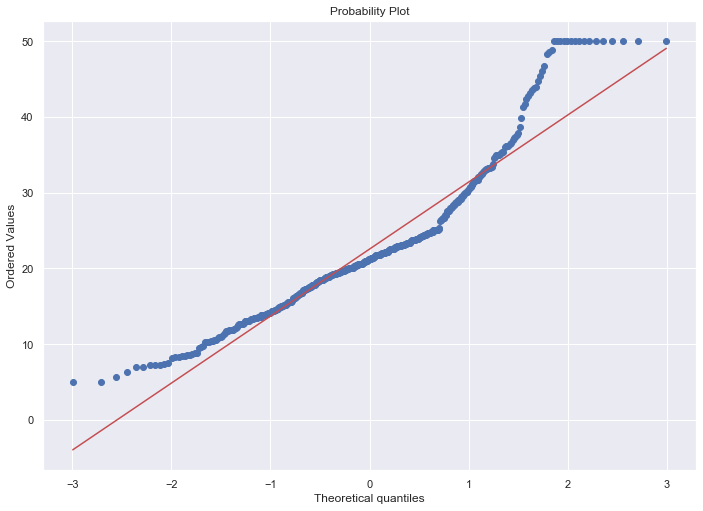

In [16]:
# Data distribution should closely follow the diagonal that represents the normal distribution.
res = stats.probplot(boston['MEDV'], plot=plt)

### Correlation matrix

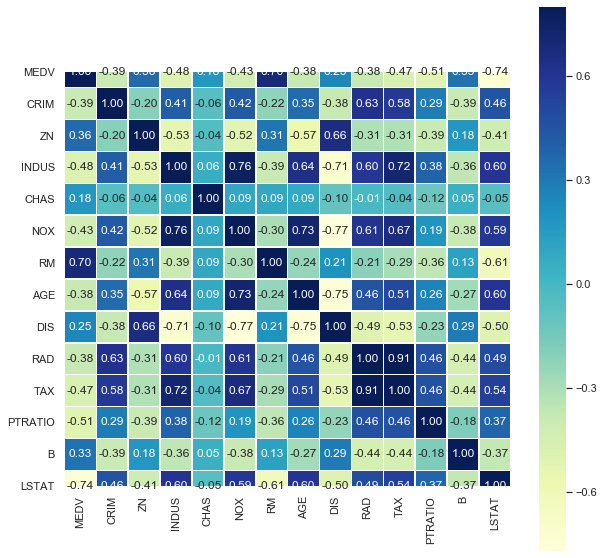

In [17]:
# The heatmap clearly shows the strength of correlation between pairs of variables
plt.figure(figsize=(10, 10))
sns.heatmap(data = boston.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

__The feature variables showing the strongest correlation with target variable MEDV are RM (0.70), LSTAT (-0.74), PTRATIO (-0.51)__


### Scatterplot matrix

Scatterplot matrix to visualise the pair-wise relationships and correlations between the selected features. It is also quite useful to give a quick overview of how the data is distributed and whether it cointains outliers.

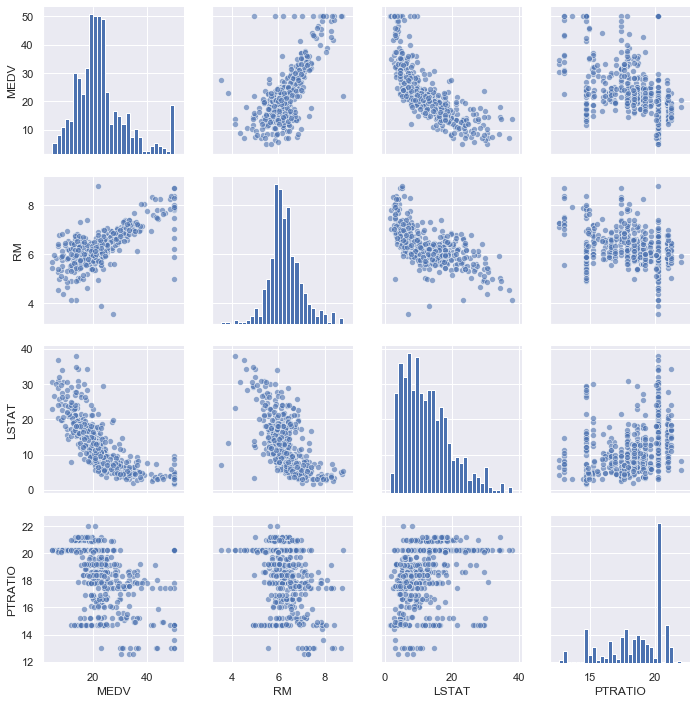

In [18]:
sns.pairplot(boston[['MEDV', 'RM', 'LSTAT', 'PTRATIO']],
    plot_kws={'alpha': 0.6},
     diag_kws={'bins': 30}) 
plt.show()   

Some observations:

- Note how the number of rooms per house (RM), the % of the population that is lower class (LSTAT) and pupil-teacher ratio by town (PTRATIO) are highly correlated with the median house value (MDEV).

- RM and MEDV have the closest shape to normal distributions.

- Price increases with RM and decreases with an increase in PTRATIO and LSTAT.

### Scatterplots along with the line of best fit linear models

The line of best fit is calculated by minimising the ordinary least squares error function, something Seaborn does automatically when we call the regplot function. Also note the shaded areas around the lines, which represent 95% confidence intervals.

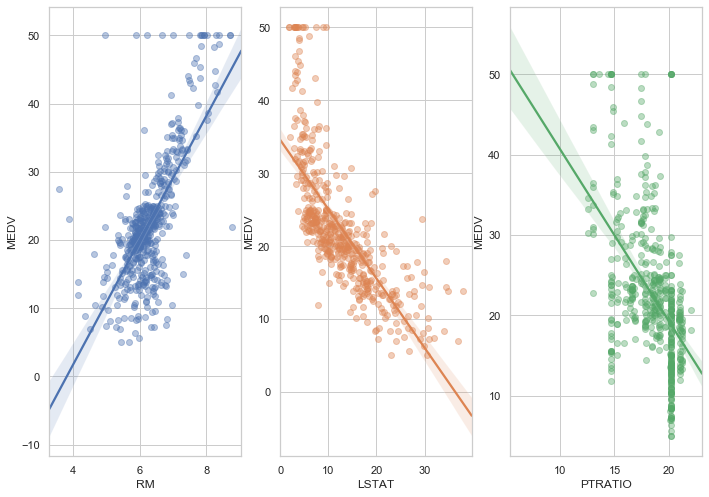

In [19]:
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(1, 3)
    sns.regplot('RM', 'MEDV', boston, ax=ax[0],
    scatter_kws={'alpha': 0.4})
    sns.regplot('LSTAT', 'MEDV', boston, ax=ax[1],
    scatter_kws={'alpha': 0.4})
    sns.regplot('PTRATIO', 'MEDV', boston, ax=ax[2],
    scatter_kws={'alpha': 0.4})
    plt.show()
    

###  Plot the residuals for these relationships

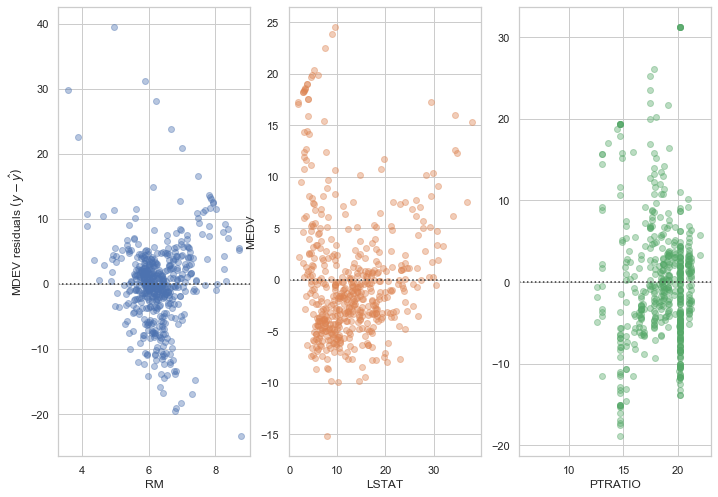

In [20]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3)
ax[0] = sns.residplot('RM', 'MEDV', boston, ax=ax[0],
                      scatter_kws={'alpha': 0.4})
ax[0].set_ylabel('MDEV residuals $(y-\hat{y})$')
ax[1] = sns.residplot('LSTAT', 'MEDV', boston, ax=ax[1],
                      scatter_kws={'alpha': 0.4})
ax[1] = sns.residplot('PTRATIO', 'MEDV', boston, ax=ax[2],
                      scatter_kws={'alpha': 0.4})
ax[1].set_ylabel('')
plt.show()

Each point on these residual plots is the difference between that sample (y) and the linear model prediction ( ŷ). Residuals greater than zero are data points that would be underestimated by the model. Likewise, residuals less than zero are data points that would be overestimated by the model.

Patterns in these plots can indicate suboptimal modelling. In each preceding case, we see diagonally arranged scatter points in the positive region. These are caused by the $50,000 cap on MEDV. The RM data is clustered nicely around 0, which indicates a good fit. On the other hand, LSTAT appears to be clustered lower than 0.

### Boxplots showing the distribution of the data

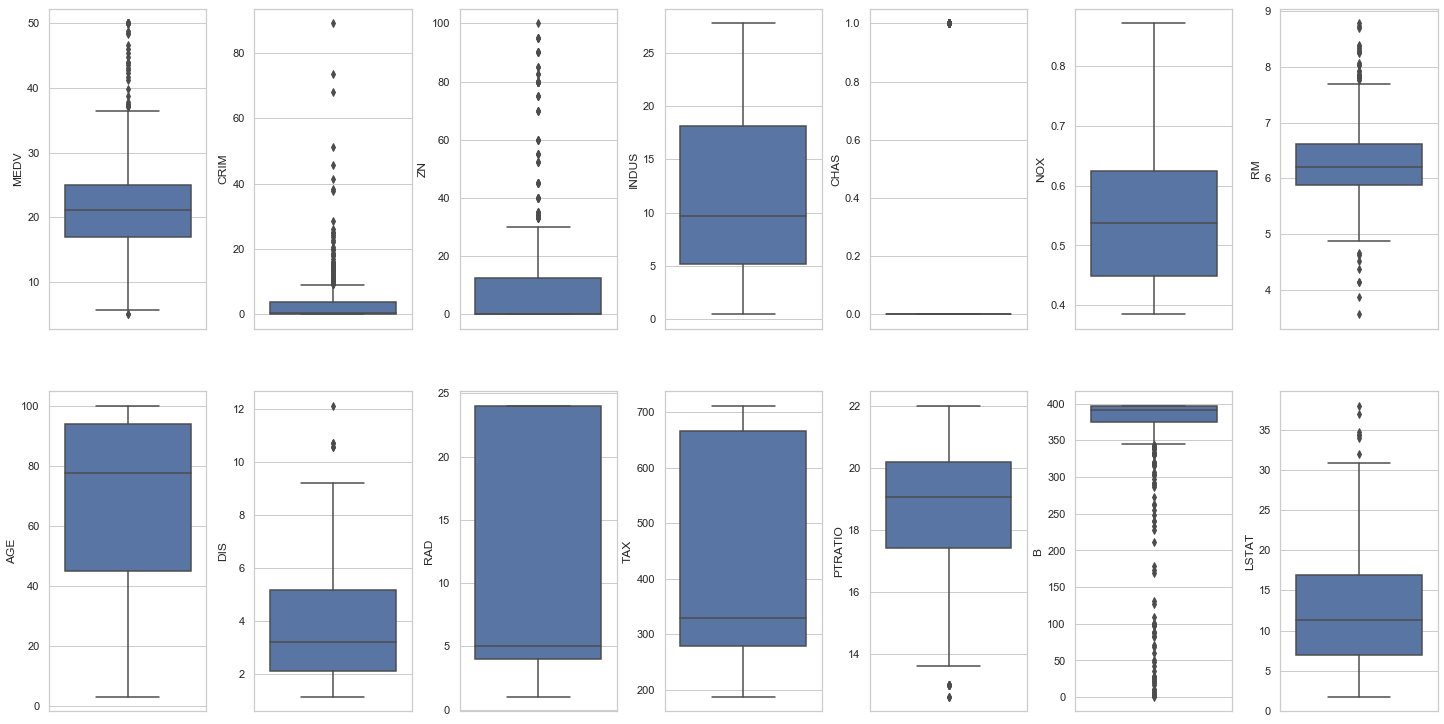

In [21]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.boxplot(y=k, data=boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

A few columns appear to have outliers.

### Percentage of outliers in each column

In [22]:
    for k, v in boston.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(boston)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column MEDV outliers = 7.91%
Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%


In [23]:
# remove MEDV outliers
boston = boston[~(boston['MEDV'] >= 50.0)]
print(np.shape(boston))

(490, 14)


### Feature Selection

The following assumptions can be made:
- Houses with more rooms (higher ‘RM’ value) will be worth more, so an increase in RM value increases MEDV value i.e. price of the house. They are directly proportional variables. 
- Houses in neighbourhoods with more lower status residents (higher ‘LSTAT’ value) will worth less, so the lower the value of LSTAT the higher the value of MEDV. They are inversely proportional variables. 
- Houses in neighbourhoods with a higher student to teacher ratio (higher ‘PTRATIO’ value) will be worth less, so a decrease in the PTRATIO value increases MEDV. They are inversely proportional variables. 


As our goal is to develop a model that has the capacity of predicting the value of houses, we will split the dataset into relevant features ('RM', 'LSTAT' and 'PTRATIO') and the target variable 'MEDV', and store them in features and prices variables respectively.

All other non-relevant features will be excluded.


In [24]:
prices = boston['MEDV']
boston = boston.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B'], axis = 1)
features = boston.drop('MEDV', axis = 1)
boston.head()

,MEDV,RM,PTRATIO,LSTAT
0,24.0,6.575,15.3,4.98
1,21.6,6.421,17.8,9.14
2,34.7,7.185,17.8,4.03
3,33.4,6.998,18.7,2.94
4,36.2,7.147,18.7,5.33


## 4. Prepare the data for training the model

### Split the dataframe


In [25]:
# As the dataframe has already been split we will assign features to X and target (prices) to y. 
# The feature count has dropped by 16 due to excluding MDEV outliers.
X = features
y = prices
print(X.shape)
print(y.shape)


(490, 3)
(490,)


### Standardise the dataset
As there are different data distributions, we will standardise the dataset so that the attributes are transformed to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

In [26]:
# Scale the data
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

### Shuffle and split the data into training and test sets
We will split the data into training and test subsets, train the model with 80% of the samples and test with the remaining 20%. The data will be shuffled into a random order to remove any bias in the ordering of the dataset. Finally we will print the sizes of our training and test set to verify if the splitting has occurred properly.

In [27]:
# Split and shuffle the data
seed = 9
test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(392, 3)
(98, 3)
(392,)
(98,)


### Evaluate algorithms

We will use different regression models to produce a baseline accuracy for this problem. It is difficult to measure the quality of a given model without quantifying its performance on the training and test sets. 


### Choose test options and define a performance metric

We will use a 10-fold cross-validation method and the MSE (Mean Squared Error) as the performance metric for these regression models.

In [28]:
# 10-fold cross-validation and performance metric


folds = 10
metric = "neg_mean_squared_error"


### Spot check a set of algorithms

In [29]:
# Hold different regression models in a single dictionary


models = {}
models["Linear"] = LinearRegression()
models["Lasso"] = Lasso()
models["Ridge"] = Ridge()
models["ElasticNet"] = ElasticNet()
models["KNN"] = KNeighborsRegressor()
models["DecisionTree"] = DecisionTreeRegressor()
models["SVR"] = SVR(gamma='scale')
models["AdaBoost"] = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"] = RandomForestRegressor()
models["ExtraTrees"]= ExtraTreesRegressor()

### Evaluate each model in turn

In [30]:
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

Linear: -16.594, 6.527
Lasso: -52.1, 18.065
Ridge: -16.719, 6.71
ElasticNet: -55.595, 17.807
KNN: -10.411, 4.332
DecisionTree: -20.729, 5.201
SVR: -14.037, 6.149
AdaBoost: -11.511, 4.08
GradientBoost: -9.908, 3.418
RandomForest: -10.892, 2.634
ExtraTrees: -11.718, 3.979


### Boxplot to compare regression models

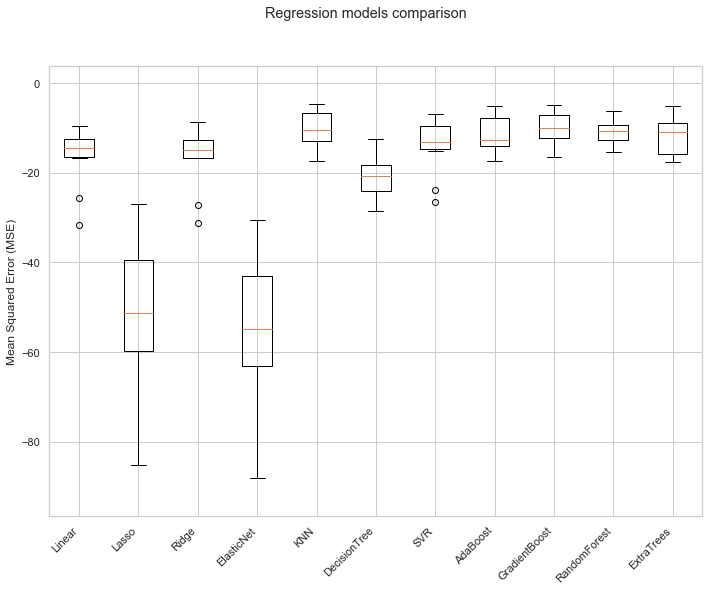

In [31]:
# Compare algorithms
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)



### Choose a model

Based on the above comparison, we can see that Gradient Boosting Regression model outperforms all the other regression models. So, we will choose it as the best model for this problem.

### Create and train the model


In [32]:
# Create a Gradient Boosting Regression model
gbr = GradientBoostingRegressor(random_state=seed)

# Train the model using the training sets
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=9,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

### Model evaluation


In [33]:
# Make predictions using the model
predictions = gbr.predict(X_test)


# The mean squared error
print("MSE : {}".format(round(mean_squared_error(y_test, predictions), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('Variance score: {}'.format(round(r2_score(y_test, predictions), 2)))

MSE : 15.818
Variance score: 0.78


The Gradient Boosting Regression model is able to predict correct values on test data with MSE of 15.818.

### Plot predictions against original targets

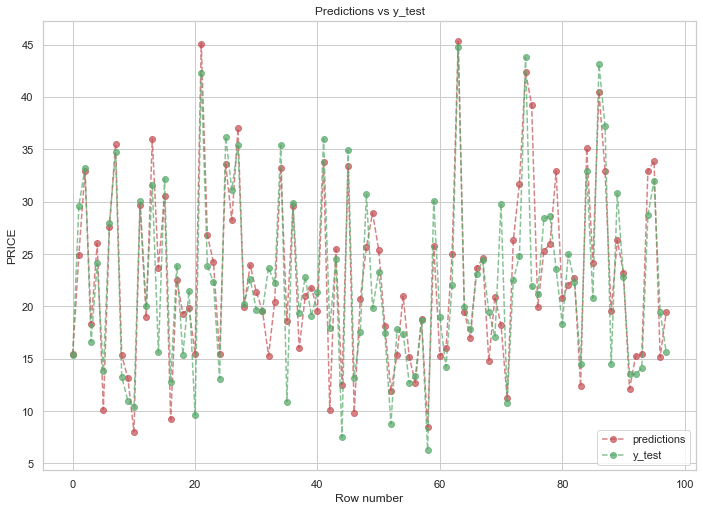

In [34]:
# Plot between predictions made by model and y_test original data
x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, predictions, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="y_test")
plt.xlabel('Row number')
plt.ylabel('PRICE')
plt.title('Predictions vs y_test')
plt.legend(loc='lower right')
plt.show()

### Optimise the Gradient Boosting Regression  model

The Grid Search technique exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter, which is a dictionary with the values of the hyperparameters to evaluate. When fitting it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

In [35]:
# Tune the scaled Gradient Boosting Regression model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400,450,500]))
model = GradientBoostingRegressor(random_state=seed)
k_fold  = KFold(n_splits=folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=metric, cv=k_fold)
grid_result = grid.fit(rescaledX, y_train)

print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{} ({}) with: {}".format(mean, stdev, param))
    
    


Best: -9.648973566784766 using {'n_estimators': 50}
-9.648973566784766 (3.5068667014636894) with: {'n_estimators': 50}
-9.893810036259577 (3.3413339940807876) with: {'n_estimators': 100}
-10.288207521662443 (3.41175520735349) with: {'n_estimators': 150}
-10.826067188011944 (3.4526287133674796) with: {'n_estimators': 200}
-11.206597989667426 (3.512719878101735) with: {'n_estimators': 250}
-11.606242542644381 (3.5448678543092638) with: {'n_estimators': 300}
-11.928695619209275 (3.5757419578058873) with: {'n_estimators': 350}
-12.171905080766251 (3.6133690504782137) with: {'n_estimators': 400}
-12.431938274603887 (3.653087225590622) with: {'n_estimators': 450}
-12.620253295644304 (3.686986548986482) with: {'n_estimators': 500}


### Model evaluation

In [36]:
# Make predictions using the model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=50)
model.fit(rescaledX, y_train)
# transform the test dataset
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)



# The mean squared error
print("MSE : {}".format(round(mean_squared_error(y_test, predictions), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('Variance score: {}'.format(round(r2_score(y_test, predictions), 2)))

MSE : 14.58
Variance score: 0.8


### A plot of prices vs predicted prices

In [37]:
pd.DataFrame({"Actual": y_test, "Predict": predictions}).head()

,Actual,Predict
443,15.4,15.629065
185,29.6,24.597066
99,33.2,32.706395
47,16.6,18.631296
201,24.1,25.204412


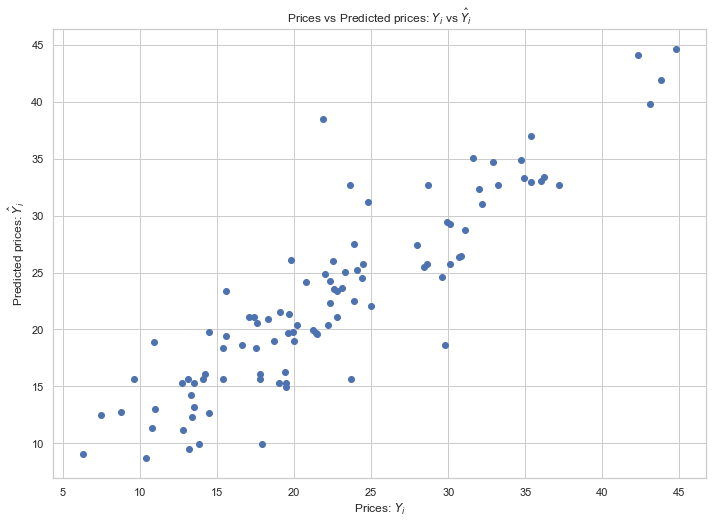

In [38]:
plt.scatter(y_test,predictions)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

### Feature Importance

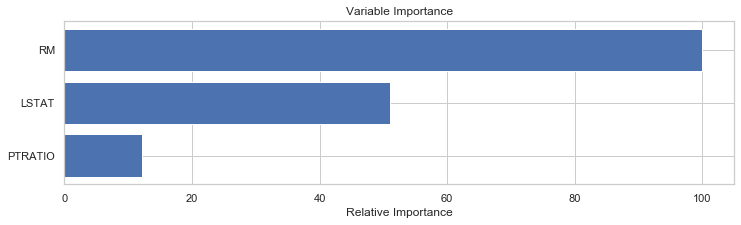

In [39]:
feature_importance = gbr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 3))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.columns.difference(['MEDV'])[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Linear Regression model

In [40]:
# Create a Linear Regression model
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the model
predictions = regr.predict(X_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("MSE : {}".format(round(mean_squared_error(y_test, predictions), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('Variance score: {}'.format(round(r2_score(y_test, predictions), 2)))

Coefficients: 
 [ 19.8393011   -9.34799929 -19.04485929]
MSE : 23.919
Variance score: 0.67


### k-nearest neighbors regressor model

In [41]:
# Tune the scaled KNN model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
k_fold = KFold(n_splits=folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=metric, cv=k_fold)
grid_result = grid.fit(rescaledX, y_train)

print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{} ({}) with: {}".format(mean, stdev, param))

Best: -10.703959808413162 using {'n_neighbors': 7}
-17.277423469387756 (5.290476077540191) with: {'n_neighbors': 1}
-11.542108843537413 (4.053150617552509) with: {'n_neighbors': 3}
-10.821633673469389 (4.0196268852038495) with: {'n_neighbors': 5}
-10.703959808413162 (4.491319201159019) with: {'n_neighbors': 7}
-10.933125472411188 (4.5875586761498335) with: {'n_neighbors': 9}
-10.865670222634504 (4.290083235484829) with: {'n_neighbors': 11}
-10.909093406593405 (4.37586774646071) with: {'n_neighbors': 13}
-11.159241383219953 (4.566065857995375) with: {'n_neighbors': 15}
-11.431057923169268 (4.597261396769863) with: {'n_neighbors': 17}
-11.521423342190062 (4.797273211106901) with: {'n_neighbors': 19}
-11.71921329075848 (4.8594245293778355) with: {'n_neighbors': 21}


In [42]:
# Create a KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=7)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Make predictions using the model
predictions = knn.predict(X_test)


# The mean squared error
print("MSE : {}".format(round(mean_squared_error(y_test, predictions), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('Variance score: {}'.format(round(r2_score(y_test, predictions), 2)))

MSE : 16.257
Variance score: 0.78


## 5. Conclusion

In summary the Gradient Boosting Regressor was the best performing model, and the most important features in modelling prediction of median house prices (MEDV) are the average number of rooms per dwelling (RM), percentage of the population who are of lower status(LSTAT) and pupil-teacher ratio by town (PTRATIO). The second best performing model was K Neighbors Regressor. 

